In [1]:
#dataset:https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
import pymc as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data = pd.read_csv('./titanic.csv')

In [3]:
data = data[['Survived', 'Pclass', 'Age', 'Sex', 'Fare']]

In [4]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [5]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [6]:
data

,Survived,Pclass,Age,Sex,Fare
0,0,3,22.000000,0,7.2500
1,1,1,38.000000,1,71.2833
2,1,3,26.000000,1,7.9250
3,1,1,35.000000,1,53.1000
4,0,3,35.000000,0,8.0500
...,...,...,...,...,...
886,0,2,27.000000,0,13.0000
887,1,1,19.000000,1,30.0000
888,0,3,29.699118,1,23.4500
889,1,1,26.000000,0,30.0000


In [7]:
X = data[['Pclass', 'Age', 'Sex', 'Fare']]
y = data['Survived']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
assert X_train.shape[0] == y_train.shape[0]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
with pm.Model() as model:
    betas = pm.Normal('betas', mu=0, sigma=1, shape=(X_scaled.shape[1],))
    z = pm.MvNormal('z', mu=X_scaled @ betas, chol=np.eye(X_scaled.shape[0]), shape=(X_scaled.shape[0],))
    p = pm.math.invlogit(X_scaled @ betas)
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y_train)
    trace = pm.sample(500, chains=2, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, z]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 163 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


D:\anaconda\envs\myenv\lib\site-packages\arviz\data\base.py:221: UserWarning: More chains (1000) than draws (4). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
D:\anaconda\envs\myenv\lib\site-packages\arviz\data\base.py:221: UserWarning: More chains (1000) than draws (712). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
D:\anaconda\envs\myenv\lib\site-packages\arviz\utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


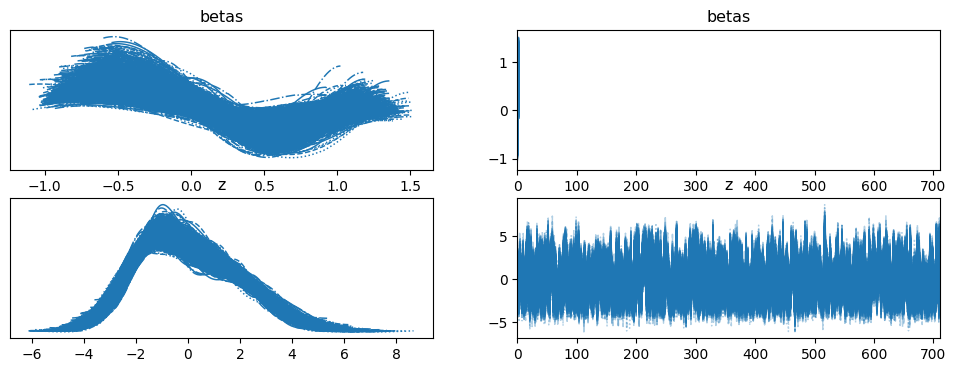

In [16]:
import arviz as az
import matplotlib.pyplot as plt
trace_data = {var: trace.get_values(var) for var in trace.varnames}
inference_data = az.from_dict(posterior=trace_data)
az.plot_trace(inference_data)
plt.show()

In [19]:
n_values = [100, 200, 400]  
m_values = [2, 3, 4]  
p = 1  
results = []
for n in n_values:
    for m in m_values:
        X_subset = X_scaled[:n, :m] 
        y_subset = y[:n]
        with pm.Model() as model:
            betas = pm.Normal('betas', mu=0, sigma=1, shape=(X_subset.shape[1],))
            z = pm.MvNormal('z', mu=X_subset @ betas, chol=np.eye(X_subset.shape[0]), shape=X_subset.shape[0])
            p_ = pm.math.invlogit(X_subset @ betas)
            y_obs = pm.Bernoulli('y_obs', p=p_, observed=y_subset)
            trace = pm.sample(1000, chains=2, return_inferencedata=False)
        results.append({'n': n, 'm': m, 'trace': trace})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, z]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 32 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, z]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 33 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, z]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 33 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, z]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 34 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, z]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 39 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, z]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 37 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas, z]


KeyboardInterrupt: 